In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as sgt
from scipy.stats.distributions import chi2
from statsmodels.tsa.arima.model import ARIMA
import yfinance as yf
sns.set()

# Import Data

In [99]:
df = yf.download(tickers = "^GSPC ^FTSE ^N225 ^GDAXI",
                 start = "1994-01-07",
                 end= "2022-10-19",
                 interval="1d",
                 group_by="ticker",
                 auto_adjust=True,
                 treads=True)

[*********************100%***********************]  4 of 4 completed


In [100]:
df.head()

^GSPC                                                   \
                  Open        High         Low       Close       Volume   
Date                                                                      
1994-01-07  467.089996  470.260010  467.029999  469.899994  324920000.0   
1994-01-10  469.899994  475.269989  469.549988  475.269989  319490000.0   
1994-01-11  475.269989  475.279999  473.269989  474.130005  305490000.0   
1994-01-12  474.130005  475.059998  472.140015  474.170013  310690000.0   
1994-01-13  474.170013  474.170013  471.799988  472.470001  277970000.0   

                  ^FTSE                                                \
                   Open         High          Low        Close Volume   
Date                                                                    
1994-01-07  3401.399902  3446.800049  3398.699951  3446.000000    0.0   
1994-01-10  3465.699951  3468.100098  3430.000000  3440.600098    0.0   
1994-01-11  3442.500000  3442.500000  3413.500000  3413.800049    0.0   
1994-01-12  3394.800049  3402.399902  3372.000000  3372.000000    0.0   
1994-01-13  3380.699951  3383.300049  3356.899902  3360.000000    0.0   

                 ^GDAXI                                                \
                   Open         High          Low        Close Volume   
Date                                                                    
1994-01-07  2218.959961  2227.639893  2201.820068  2224.949951    0.0   
1994-01-10  2231.840088  2238.010010  2222.000000  2225.000000    0.0   
1994-01-11  2225.429932  2235.610107  2225.179932  2228.100098    0.0   
1994-01-12  2227.120117  2227.790039  2182.060059  2182.060059    0.0   
1994-01-13  2171.500000  2183.709961  2134.100098  2142.370117    0.0   

                   ^N225                                                   
                    Open          High           Low         Close Volume  
Date                                                                       
1994-01-07  17842.980469  18131.410156  17787.480469  18124.009766    0.0  
1994-01-10  18186.519531  18567.060547  18186.519531  18443.439453    0.0  
1994-01-11  18481.849609  18671.669922  18373.039062  18485.250000    0.0  
1994-01-12  18447.339844  18807.080078  18301.929688  18793.880859    0.0  
1994-01-13  18770.380859  18823.380859  18548.750000  18577.259766    0.0

In [101]:
df["spx"] = df["^GSPC"].Close
df["dax"] = df["^GDAXI"].Close
df["ftse"] = df["^FTSE"].Close
df["nikkei"] = df["^N225"].Close

In [102]:
df = df.iloc[1:]
del df["^N225"]
del df["^GSPC"]
del df["^GDAXI"]
del df["^FTSE"]
df = df.asfreq("b")
df = df.fillna(method="ffill")

# Examining the Data 

In [103]:
df.describe()

,spx,dax,ftse,nikkei
,,,,
count,7507.000000,7507.000000,7507.000000,7507.000000
mean,1641.661006,7238.310266,5687.463539,16211.941666
std,953.400138,3676.969573,1224.242812,5354.249816
min,438.920013,1911.699951,2876.600098,7054.979980
25%,1073.455017,4381.695068,4847.050049,11253.540039
50%,1315.219971,6331.299805,5888.899902,16228.900391
75%,2060.650024,10047.330078,6607.800049,19890.625000
max,4796.560059,16271.750000,7877.500000,30670.099609


In [77]:
df.isna().sum()

spx         241
dax         198
ftse        218
nikkei      426
dtype: int64

# Plotting the Data 

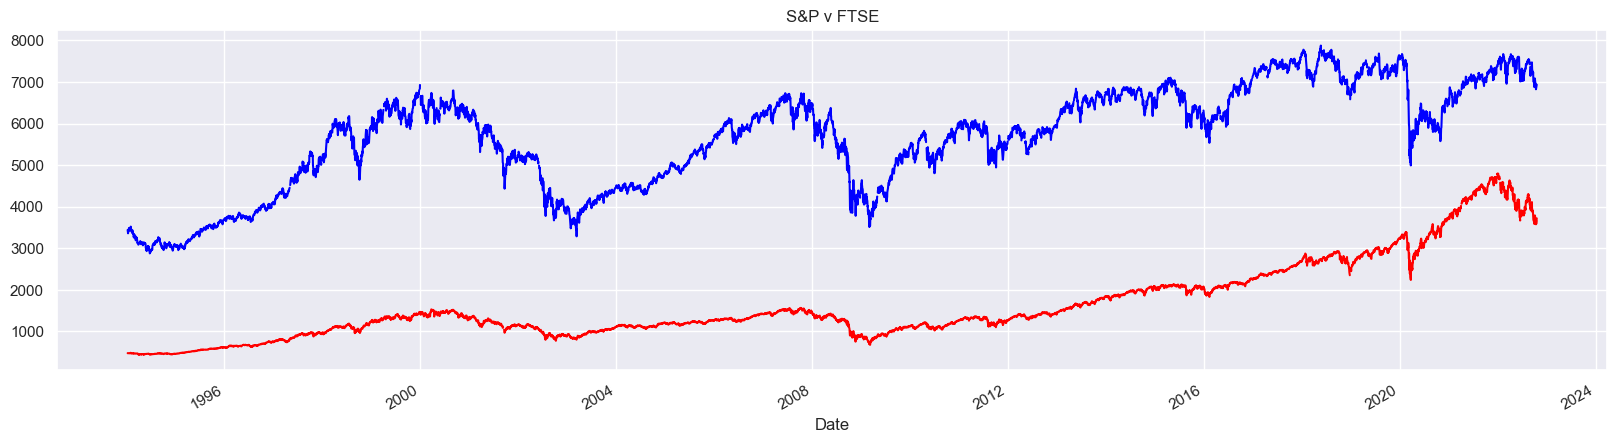

In [78]:
df.spx.plot(figsize=(20,5),title= "S&P500 Prices", color="red")
df.ftse.plot(figsize=(20,5),title= "FTSE100 Prices", color="blue")
plt.title("S&P v FTSE")
plt.show()

# The QQ Plot

In [79]:
import scipy.stats
import pylab

<function matplotlib.pyplot.show(close=None, block=None)>

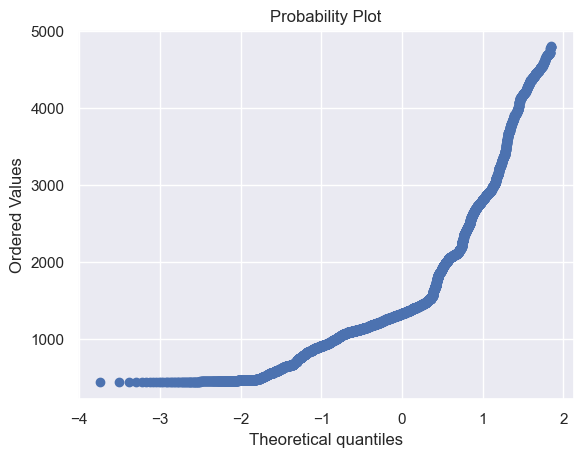

In [80]:
scipy.stats.probplot(df.spx, plot = pylab)
pylab.show

# Simplifying the Dataset

In [81]:
df["market_value"] = df.spx

In [82]:
df.describe()

,spx,dax,ftse,nikkei,market_value
,,,,,
count,7246.000000,7289.000000,7269.000000,7061.000000,7246.000000
mean,1641.529032,7240.670901,5685.565578,16209.292395,1641.529032
std,953.890959,3676.373880,1224.618088,5347.354661,953.890959
min,438.920013,1911.699951,2876.600098,7054.979980,438.920013
25%,1071.667511,4385.290039,4845.500000,11271.120117,1071.667511
50%,1315.159973,6331.330078,5885.399902,16215.740234,1315.159973
75%,2060.187561,10048.049805,6606.600098,19905.460938,2060.187561
max,4796.560059,16271.750000,7877.500000,30670.099609,4796.560059


In [83]:
del df["spx"]

In [84]:
df.describe()

,dax,ftse,nikkei,market_value
,,,,
count,7289.000000,7269.000000,7061.000000,7246.000000
mean,7240.670901,5685.565578,16209.292395,1641.529032
std,3676.373880,1224.618088,5347.354661,953.890959
min,1911.699951,2876.600098,7054.979980,438.920013
25%,4385.290039,4845.500000,11271.120117,1071.667511
50%,6331.330078,5885.399902,16215.740234,1315.159973
75%,10048.049805,6606.600098,19905.460938,2060.187561
max,16271.750000,7877.500000,30670.099609,4796.560059


In [85]:
del df["dax"] ,  df["ftse"],  df["nikkei"] 

In [86]:
df.describe()

,market_value
,
count,7246.000000
mean,1641.529032
std,953.890959
min,438.920013
25%,1071.667511
50%,1315.159973
75%,2060.187561
max,4796.560059


In [87]:
df

,market_value
,
Date,
1994-01-10,475.269989
1994-01-11,474.130005
1994-01-12,474.170013
1994-01-13,472.470001
1994-01-14,474.910004
...,...
2022-10-12,3577.030029
2022-10-13,3669.909912


# Splitting the Data

In [89]:
size = int(len(df)*0.8)

In [90]:
df = df.iloc[:size]

In [91]:
df_test = df.iloc[size:]

In [92]:
df.tail()

,market_value
,
Date,
2017-01-09,2268.899902
2017-01-10,2268.899902
2017-01-11,2275.320068
2017-01-12,2270.439941
2017-01-13,2274.639893


In [93]:
df_test.head()

,market_value
,
Date,


# White Noise 

In [88]:
wn = np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(), size = len(df))

In [89]:
df['wn'] = wn

In [90]:
df.describe()

,market_value,wn
,,
count,6005.000000,6005.000000
mean,1234.987142,1235.176094
std,425.271963,419.400304
min,438.920013,-481.568054
25%,975.039978,959.099313
50%,1212.050049,1240.096395
75%,1422.449951,1518.479270
max,2276.979980,3013.773077


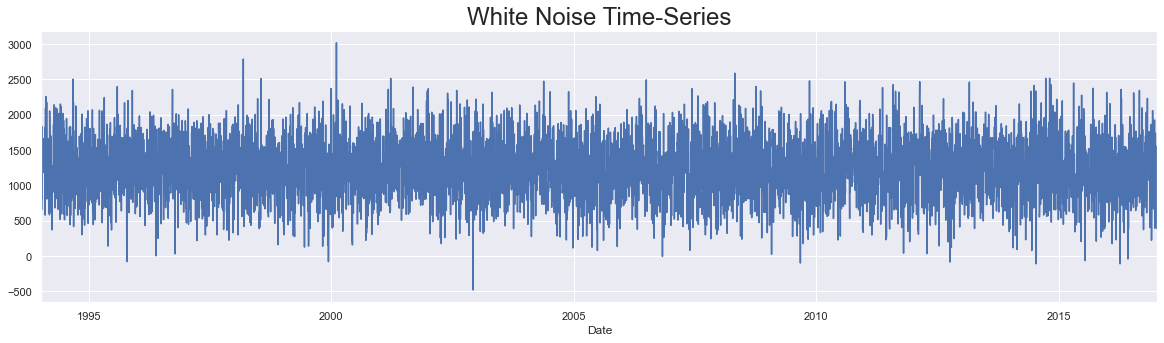

In [91]:
df.wn.plot(figsize=(20,5))
plt.title("White Noise Time-Series", size=24)
plt.show()

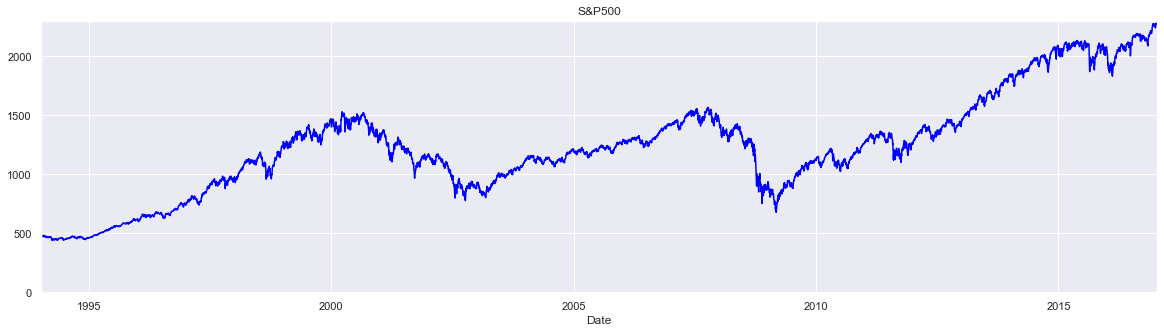

In [92]:
df.market_value.plot(figsize=(20,5) ,color="blue")
plt.title("S&P500")
plt.ylim(0,2300)
plt.show()

# Random Walk

In [93]:
rw = pd.read_csv(r"C:\Users\lenovo\Desktop\PythonData\Time-Series\RandWalk.csv") ##index_col=0
rw.date = pd.to_datetime(rw.date, dayfirst = True)
rw.set_index("date", inplace=True)
rw = rw.asfreq("b")

In [94]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [95]:
df["rw"] = rw.price

In [96]:
df.head()

,market_value,wn,rw
,,,
Date,,,
1994-01-10,475.269989,1461.790824,1080.347860
1994-01-11,474.130005,654.488707,1082.095245
1994-01-12,474.170013,1832.615615,1083.639265
1994-01-13,472.470001,810.919838,1067.146255
1994-01-14,474.910004,1114.791787,1080.129720


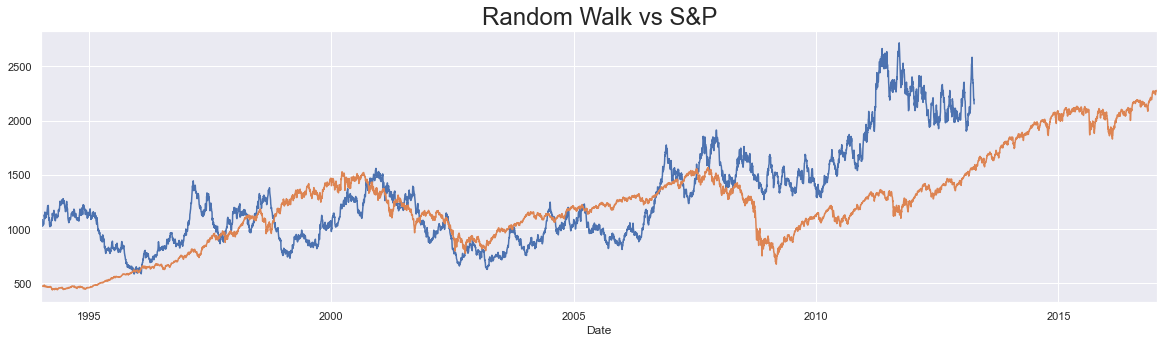

In [97]:
df.rw.plot(figsize = (20,5))
df.market_value.plot()
plt.title("Random Walk vs S&P", size=24)
plt.show()

# Stationarity

In [98]:
sts.adfuller(df.market_value) 
#1-     
#2- p-value
#3- number_of_leg
#4-5002 number of datasize
#son- 

(-0.37379444790822547,
 0.9143830800881055,
 18,
 5986,
 {'1%': -3.4314429011738437,
  '5%': -2.8620229616496,
  '10%': -2.567027078059073},
 48169.76223420747)

In [99]:
sts.adfuller(df.wn)

(-78.45395997618493,
 0.0,
 0,
 6004,
 {'1%': -3.43143962325222,
  '5%': -2.862021513375629,
  '10%': -2.567026307104391},
 89046.16933149459)

In [102]:
sts.adfuller(df.rw)

MissingDataError: exog contains inf or nans

# Seasonality

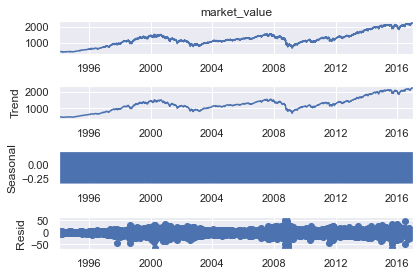

In [103]:
s_dec_additive = seasonal_decompose(df.market_value, model="additive")
s_dec_additive.plot()
plt.show() 

#3- no concrete cyclical pattern
#4- 2000 - 2008  bubles
#no seasonality in the data

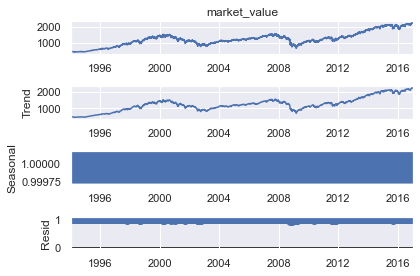

In [104]:
s_dec_multi = seasonal_decompose(df.market_value, model="multiplicative")
s_dec_multi.plot()
plt.show()

# ACF

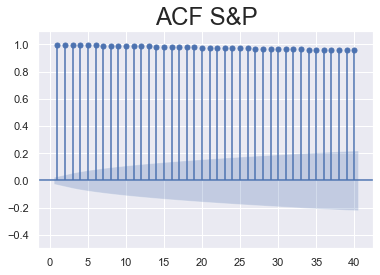

In [105]:
sgt.plot_acf(df.market_value, lags = 40, zero = False)
plt.title("ACF S&P", size=24)
plt.ylim(-0.5,1.1)
plt.show()

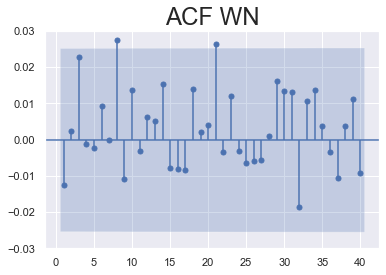

In [106]:
sgt.plot_acf(df.wn, lags = 40, zero = False)
plt.title("ACF WN", size=24)
plt.ylim(-0.03,0.03)
plt.show()  #no autocorrelation for any lag

C:\Users\lenovo\anaconda3\envs\Timeseries_Project\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


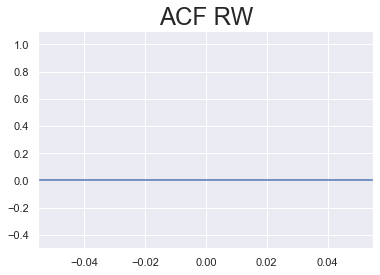

In [107]:
sgt.plot_acf(df.rw, lags = 40, zero = False)
plt.title("ACF RW", size=24)
plt.ylim(-0.5,1.1)
plt.show()

# PACF

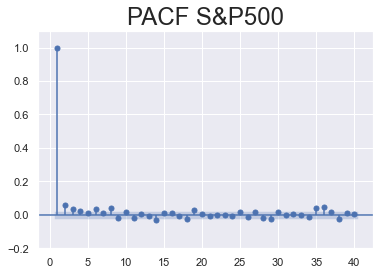

In [108]:
sgt.plot_pacf(df.market_value, lags = 40, zero =False, method = ("ols"))
plt.title("PACF S&P500", size = 24)
plt.ylim(-0.2,1.1)
plt.show()

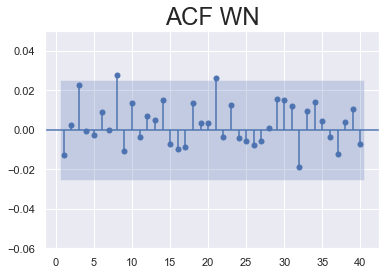

In [109]:
sgt.plot_pacf(df.wn, lags = 40, zero =False, method = ("ols"))
plt.title("ACF WN", size = 24)
plt.ylim(-0.06,0.05)
plt.show()

LinAlgError: SVD did not converge in Linear Least Squares

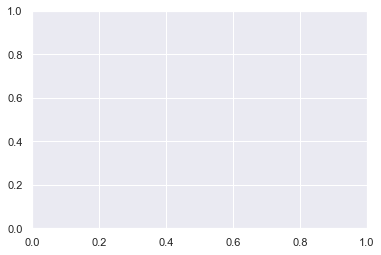

In [110]:
sgt.plot_pacf(df.rw, lags = 40, zero =False, method = ("ols"))
plt.title("ACF RW", size = 24)
plt.ylim(-0.1,1.1)
plt.show()

# The ACF

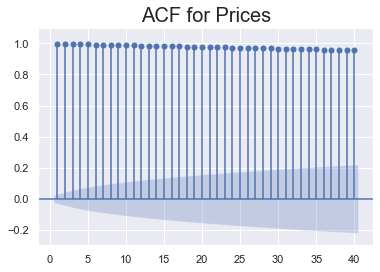

In [111]:
sgt.plot_acf(df.market_value, zero = False, lags = 40)
plt.title("ACF for Prices", size = 20)
plt.ylim(-0.3,1.1)
plt.show()

# The PACF

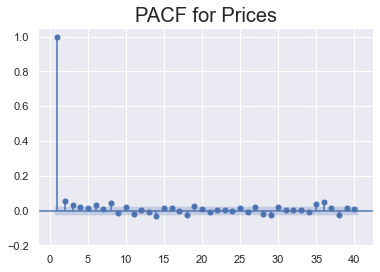

In [112]:
sgt.plot_pacf(df.market_value, lags=40 , alpha = 0.05, zero = False, method = "ols")
plt.title("PACF for Prices", size = 20)
plt.ylim(-0.2,1.05)
plt.show()

# The AR(1) Model

In [113]:
model_ar = ARIMA(df.market_value, order = (1,0,0))

In [114]:
results_ar = model_ar.fit()

In [115]:
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6005
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -24229.522
Date:                Thu, 20 Oct 2022   AIC                          48465.045
Time:                        12:48:35   BIC                          48485.146
Sample:                    01-10-1994   HQIC                         48472.025
                         - 01-13-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1234.9871    371.016      3.329      0.001     507.810    1962.164
ar.L1          0.9997      0.000   2508.975      0.000       0.999       1.000
sigma2       186.8928      1.819    102.726      0.000     183.327     190.459
===================================================================================
Ljung-Box (L1) (Q):                  19.16   Jarque-Bera (JB):              6696.46
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.48   Skew:                            -0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Higher-Lag AR Models

In [116]:
model_ar2 = ARIMA(df.market_value, order = (2,0,0))
results_ar2 = model_ar2.fit()
results_ar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6005
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -24220.047
Date:                Thu, 20 Oct 2022   AIC                          48448.094
Time:                        12:48:39   BIC                          48474.895
Sample:                    01-10-1994   HQIC                         48457.401
                         - 01-13-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1234.9871    415.247      2.974      0.003     421.119    2048.856
ar.L1          0.9437      0.008    112.360      0.000       0.927       0.960
ar.L2          0.0561      0.008      6.684      0.000       0.040       0.072
sigma2       186.3365      1.812    102.809      0.000     182.784     189.889
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              6800.84
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               1.48   Skew:                            -0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [117]:
model_ar3 = ARIMA(df.market_value, order = (3,0,0))
results_ar3 = model_ar3.fit()
results_ar3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6005
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -24216.940
Date:                Thu, 20 Oct 2022   AIC                          48443.880
Time:                        12:48:42   BIC                          48477.382
Sample:                    01-10-1994   HQIC                         48455.514
                         - 01-13-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1234.9871    449.141      2.750      0.006     354.686    2115.288
ar.L1          0.9419      0.008    112.027      0.000       0.925       0.958
ar.L2          0.0259      0.011      2.348      0.019       0.004       0.047
ar.L3          0.0320      0.007      4.368      0.000       0.018       0.046
sigma2       186.1632      1.834    101.486      0.000     182.568     189.758
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              6667.83
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               1.48   Skew:                            -0.38
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [118]:
model_ar4 = ARIMA(df.market_value, order = (4,0,0))
results_ar4 = model_ar4.fit()
results_ar4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6005
Model:                 ARIMA(4, 0, 0)   Log Likelihood              -24215.768
Date:                Thu, 20 Oct 2022   AIC                          48443.536
Time:                        12:48:43   BIC                          48483.738
Sample:                    01-10-1994   HQIC                         48457.496
                         - 01-13-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1234.9871    469.337      2.631      0.009     315.104    2154.870
ar.L1          0.9412      0.008    111.997      0.000       0.925       0.958
ar.L2          0.0253      0.011      2.298      0.022       0.004       0.047
ar.L3          0.0136      0.011      1.207      0.228      -0.008       0.036
ar.L4          0.0197      0.009      2.308      0.021       0.003       0.036
sigma2       186.0448      1.835    101.376      0.000     182.448     189.642
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6661.63
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.48   Skew:                            -0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# LLR Test

In [119]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR,DF).round(3)
    return p 

In [120]:
LLR_test(model_ar, model_ar2)

0.0

In [121]:
LLR_test(model_ar2, model_ar3)

0.013

In [122]:
LLR_test(model_ar3, model_ar4)

0.126

# Comparing Higher-Lag AR Models

In [123]:
model_ar4 = ARIMA(df.market_value, order = (4,0,0))
results_ar4 = model_ar4.fit()
print(results_ar4.summary())
print("LLR Test :" + str(LLR_test(model_ar3, model_ar4)))

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 6005
Model:                 ARIMA(4, 0, 0)   Log Likelihood              -24215.768
Date:                Thu, 20 Oct 2022   AIC                          48443.536
Time:                        12:48:49   BIC                          48483.738
Sample:                    01-10-1994   HQIC                         48457.496
                         - 01-13-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1234.9871    469.337      2.631      0.009     315.104    2154.870
ar.L1          0.9412      0.008    111.997      0.000       0.925       0.958
ar.L2          0.0253      0.011      2.298      0.0

In [124]:
model_ar5 = ARIMA(df.market_value, order = (5,0,0))
results_ar5 = model_ar5.fit()
print(results_ar5.summary())
print("LLR Test :" + str(LLR_test(model_ar4, model_ar5)))

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 6005
Model:                 ARIMA(5, 0, 0)   Log Likelihood              -24215.236
Date:                Thu, 20 Oct 2022   AIC                          48444.473
Time:                        12:48:52   BIC                          48491.375
Sample:                    01-10-1994   HQIC                         48460.760
                         - 01-13-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1234.9871    489.045      2.525      0.012     276.476    2193.498
ar.L1          0.9410      0.008    111.959      0.000       0.925       0.957
ar.L2          0.0251      0.011      2.275      0.0

# The DF-Test

In [125]:
sts.adfuller(df.market_value) ## non-stationary

(-0.37379444790822547,
 0.9143830800881055,
 18,
 5986,
 {'1%': -3.4314429011738437,
  '5%': -2.8620229616496,
  '10%': -2.567027078059073},
 48169.76223420747)

# Using Returns

In [126]:
df["returns"] = df.market_value.pct_change(1).mul(100)
df = df.iloc[1:]  #ilk gün nul geleceği için dahil etmiyoruz.

In [127]:
sts.adfuller(df.returns)

(-13.90400192556572,
 5.666510840769457e-26,
 34,
 5969,
 {'1%': -3.431446015149237,
  '5%': -2.8620243374862375,
  '10%': -2.5670278104536925},
 18613.91845751183)

# ACF and PCF for Returns

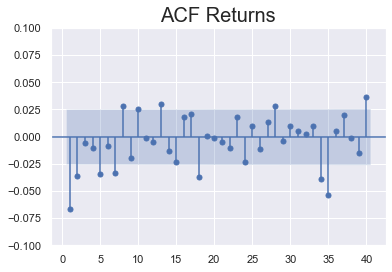

In [128]:
sgt.plot_acf(df.returns, zero = False, lags = 40)
plt.title("ACF Returns", size = 20)
plt.ylim(-0.1,0.1)
plt.show()

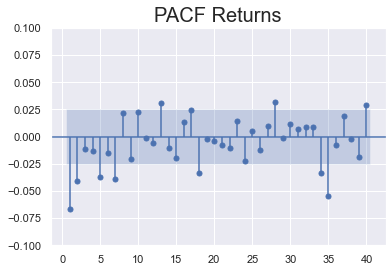

In [129]:
sgt.plot_pacf(df.returns, zero = False, lags = 40, method=("ols"))
plt.title("PACF Returns", size = 20)
plt.ylim(-0.1,0.1)
plt.show()

# AR(1) for Returns

In [130]:
model_ret_ar = ARIMA(df.returns, order = (1,0,0))
results_ret_ar = model_ret_ar.fit()
results_ret_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 6004
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -9362.312
Date:                Thu, 20 Oct 2022   AIC                          18730.625
Time:                        12:48:56   BIC                          18750.725
Sample:                    01-11-1994   HQIC                         18737.605
                         - 01-13-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0327      0.014      2.299      0.021       0.005       0.061
ar.L1         -0.0669      0.008     -8.875      0.000      -0.082      -0.052
sigma2         1.3242      0.010    126.828      0.000       1.304       1.345
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):             19468.74
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                            -0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#  Higher- Lag AR Models for Returns

In [131]:
model_ret_ar2 = ARIMA(df.returns, order = (2,0,0))
results_ret_ar2 = model_ret_ar2.fit()
print(results_ret_ar2.summary())
print("LLR Test :" + str(LLR_test(model_ret_ar, model_ret_ar2)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 6004
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -9357.332
Date:                Thu, 20 Oct 2022   AIC                          18722.664
Time:                        12:48:57   BIC                          18749.464
Sample:                    01-11-1994   HQIC                         18731.970
                         - 01-13-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0327      0.014      2.354      0.019       0.005       0.060
ar.L1         -0.0696      0.008     -9.161      0.000      -0.085      -0.055
ar.L2         -0.0407      0.006     -6.551      0.0

In [132]:
model_ret_ar3 = ARIMA(df.returns, order = (3,0,0))
results_ret_ar3 = model_ret_ar3.fit()
print(results_ret_ar3.summary())
print("LLR Test :" + str(LLR_test(model_ret_ar2, model_ret_ar3)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 6004
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -9356.957
Date:                Thu, 20 Oct 2022   AIC                          18723.914
Time:                        12:48:59   BIC                          18757.415
Sample:                    01-11-1994   HQIC                         18735.548
                         - 01-13-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0327      0.014      2.363      0.018       0.006       0.060
ar.L1         -0.0701      0.008     -9.231      0.000      -0.085      -0.055
ar.L2         -0.0415      0.006     -6.682      0.0

In [133]:
model_ret_ar4 = ARIMA(df.returns, order = (4,0,0))
results_ret_ar4 = model_ret_ar4.fit()
print(results_ret_ar4.summary())
print("LLR Test :" + str(LLR_test(model_ret_ar3, model_ret_ar4)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 6004
Model:                 ARIMA(4, 0, 0)   Log Likelihood               -9356.436
Date:                Thu, 20 Oct 2022   AIC                          18724.872
Time:                        12:49:01   BIC                          18765.073
Sample:                    01-11-1994   HQIC                         18738.832
                         - 01-13-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0327      0.014      2.361      0.018       0.006       0.060
ar.L1         -0.0702      0.008     -9.228      0.000      -0.085      -0.055
ar.L2         -0.0420      0.006     -6.764      0.0

# Normalizing Values

In [134]:
benchmark = df.market_value.iloc[0]

In [135]:
df["norm"] = df.market_value.div(benchmark).mul(100)

In [136]:
sts.adfuller(df.norm)

(-0.3928092404671974,
 0.9112924714650925,
 18,
 5985,
 {'1%': -3.4314430838589653,
  '5%': -2.8620230423647555,
  '10%': -2.567027121025901},
 29583.453251707637)

In [137]:
bench_ret = df.returns.iloc[0]
df["norm_ret"] = df.returns.div(bench_ret).mul(100)
sts.adfuller(df.norm_ret)

(-13.9040019255657,
 5.666510840769783e-26,
 34,
 5969,
 {'1%': -3.431446015149237,
  '5%': -2.8620243374862375,
  '10%': -2.5670278104536925},
 90634.3049798531)

# Normalizing Returns

In [138]:
model_norm_ret_ar_1 = ARIMA(df.norm_ret, order = (1,0,0))
results_norm_ret_ar_1 = model_norm_ret_ar_1.fit()
results_norm_ret_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 6004
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -45583.656
Date:                Thu, 20 Oct 2022   AIC                          91173.312
Time:                        12:49:04   BIC                          91193.413
Sample:                    01-11-1994   HQIC                         91180.292
                         - 01-13-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.6487      5.937     -2.299      0.022     -25.285      -2.012
ar.L1         -0.0669      0.008     -8.873      0.000      -0.082      -0.052
sigma2      2.302e+05   1815.380    126.806      0.000    2.27e+05    2.34e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):             19468.77
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                             0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [139]:
model_norm_ret_ar_2 = ARIMA(df.market_value, order = (2,0,0))
results_norm_ret_ar_2 = model_norm_ret_ar_2.fit()
print(results_norm_ret_ar_2.summary())
print("LLR Test :" + str(LLR_test(model_norm_ret_ar_1, model_norm_ret_ar_2)))

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 6004
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -24216.512
Date:                Thu, 20 Oct 2022   AIC                          48441.024
Time:                        12:49:04   BIC                          48467.825
Sample:                    01-11-1994   HQIC                         48450.331
                         - 01-13-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1235.1137    414.733      2.978      0.003     422.252    2047.975
ar.L1          0.9437      0.008    112.340      0.000       0.927       0.960
ar.L2          0.0561      0.008      6.683      0.0

In [140]:
model_norm_ret_ar_6 = ARIMA(df.market_value, order = (6,0,0))
results_norm_ret_ar_6 = model_norm_ret_ar_6.fit()
print(results_norm_ret_ar_6.summary())

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 6004
Model:                 ARIMA(6, 0, 0)   Log Likelihood              -24208.668
Date:                Thu, 20 Oct 2022   AIC                          48433.337
Time:                        12:49:06   BIC                          48486.938
Sample:                    01-11-1994   HQIC                         48451.950
                         - 01-13-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1235.1137    531.080      2.326      0.020     194.216    2276.012
ar.L1          0.9406      0.008    111.391      0.000       0.924       0.957
ar.L2          0.0250      0.011      2.254      0.0

In [141]:
model_norm_ret_ar_7 = ARIMA(df.market_value, order = (7,0,0))
results_norm_ret_ar_7 = model_norm_ret_ar_2.fit()
print(results_norm_ret_ar_7.summary())
print("LLR Test :" + str(LLR_test(model_norm_ret_ar_6, model_norm_ret_ar_7)))

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 6004
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -24216.512
Date:                Thu, 20 Oct 2022   AIC                          48441.024
Time:                        12:49:07   BIC                          48467.825
Sample:                    01-11-1994   HQIC                         48450.331
                         - 01-13-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1235.1137    414.733      2.978      0.003     422.252    2047.975
ar.L1          0.9437      0.008    112.340      0.000       0.927       0.960
ar.L2          0.0561      0.008      6.683      0.0

# Analysing the Residuals 

In [142]:
df["res_price"] = results_norm_ret_ar_7.resid

In [143]:
df.res_price.mean()

0.1898663376949835

In [144]:
df.res_price.var()

282.76818218783546

In [145]:
sts.adfuller(df.res_price)

(-18.501672179304276,
 2.1201729506213004e-30,
 17,
 5986,
 {'1%': -3.4314429011738437,
  '5%': -2.8620229616496,
  '10%': -2.567027078059073},
 48160.64257211142)

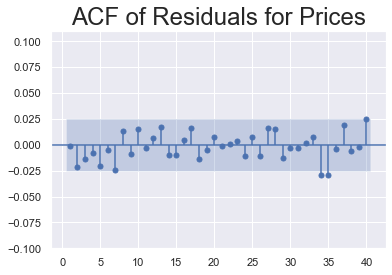

In [146]:
sgt.plot_acf(df.res_price, zero=False, lags=40)
plt.title("ACF of Residuals for Prices", size=24)
plt.ylim(-0.1,0.11)
plt.show()

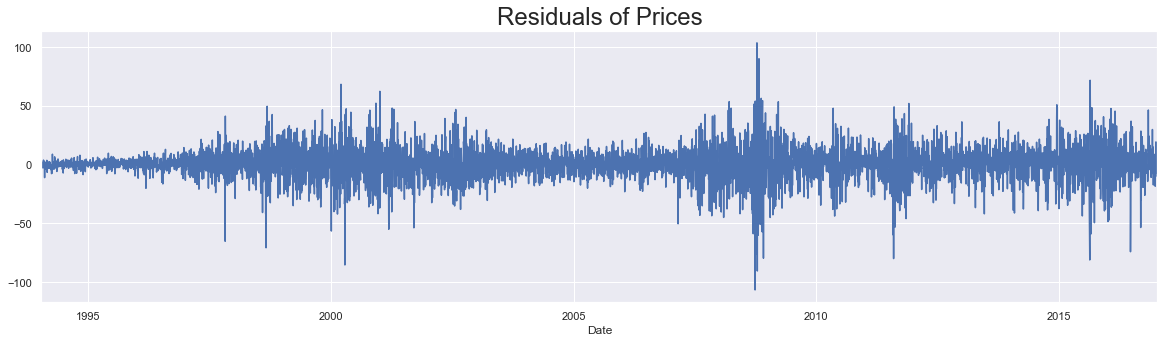

In [147]:
df.res_price[1:].plot(figsize=(20,5))
plt.title("Residuals of Prices", size=24)
plt.show()